# Convergencia de una muestra a su probabilidad

Sea $X$ una variable aleatoria tal que $X \sim Ber(0.5)$; es decir, $X$ tiene distribución bernoulli y sus probabilidades son $p(X=1) = 0.5$ y $p(X=0) = 1-p(X=1) = 0.5$.

Para probar como la convergencia de una serie de muestras con esta distribución implica la minimización de la divergencia KL y de la entropía cruzada generamos una muestra de 1 millón de datos con esta distribución.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Omega = np.random.binomial(1, 0.5, size=1000000)

En este caso, comenzaremos con tomar pequeñas muestras. Para analizar estas muestras, sabemos, por la ley de los grandes números que se da la siguiente convergencia en probabilidad:

$$\frac{1}{N} \sum_{i=1}^N X_i \to \mathbb{E}(X) = p$$

Cuando $N\to \infty$. Entonces, definiremos un estimador $q$ de este parámetro a partir de este promedio:

In [2]:
def esp(X):
    N = len(X)
    return (1./N)*X.sum(0)

Así podemos tomar alguna muestra empírica pequeña de los datos para ver que tan bien este estiamdor aproxima el parámetro $p=0.5$.

In [3]:
X = np.random.choice(Omega,size=3)

print('datos:', X, 'estimación:', esp(X))

datos: [1 0 1] estimación: 0.6666666666666666


En este caso, hemos tomado una muestra de 3 datos, $X_1, X_2, X_3$, vemos que la aproximación no es del todo buena, pues contamos con pocos datos.

Podemos ver que tanto se aleja de la distribución original, que en este caso sabemos que es Bernoulli con parámetro $p=0.5$, a partir de la divergencia KL. En este caso particular, determinaremos la divergencia como:

$$D_{KL} = p \log\frac{p}{q} + (1-p)\log\frac{1-p}{1-q}$$

In [4]:
def KL(X):
    q = esp(X)
    return 0.5*np.log(0.5/q) + 0.5*np.log(0.5/(1-q))


print(KL(X))

0.05889151782819166


Ya que $p$ y $q$ son diferente, la divergencia es diferente de 0. En los casos en que no conocemos la distribución original es mejor utilizar la entropia cruzada empírica, dada por:

$$H(X;q) = -\frac{1}{N} \sum_{i=1}^N \log q(X=x_i)$$

donde $N$ es el número de datos diferentes.

In [5]:
def crossH(X):
    q = esp(X)
    return (0.5)*(-np.log(q)-np.log(1-q))

print(crossH(X))

0.752038698388137


En este caso, buscaremos aproximar la distribución original a partir aumentar el tamaño de los datos. Así tomaremos varios datos hasta un tamaño determinado.

In [6]:
KL_list = []  #Guarda la divergencia KL
crossH_list = []  #Guarda la entropia cruzada
prob = []  #Guarda el estimador q
for i in range(1000):
    X = np.append(X,np.random.choice(Omega,size=1))

    prob.append(esp(X))
    KL_list.append(KL(X))
    crossH_list.append(crossH(X))

Ahora veremos como se aproxima este estimador $q$ al valor real $p=0.5$.

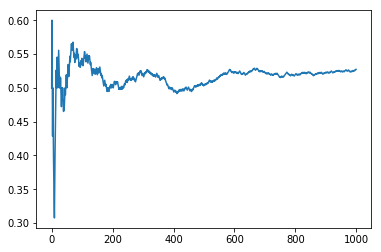

In [7]:
plt.plot(prob)
plt.show()

Como puede observarse, en cuanto aumenta el número de datos el parámetro tiende a converger al valor real. De esta forma, la divergencia KL debe minimizarse.

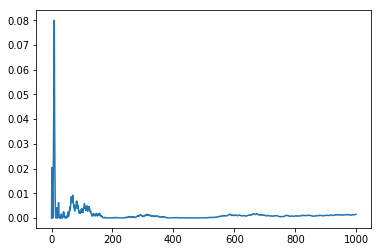

In [8]:
plt.plot(KL_list)
plt.show()

Podemos observar que, en efecto, la divergencia KL disminuye conforme el estimador se aproxima más al valor real.

Pero de igual forma, sabemos que minimizar la entropía cruzada equivale a minimizar la divergencia KL, por lo que tenemos que también debe decrecer.

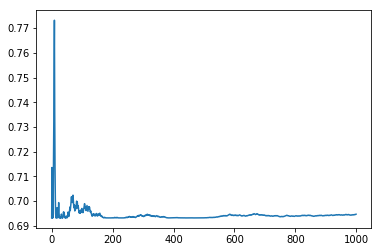

In [9]:
plt.plot(crossH_list)
plt.show()

En efecto, vemos que la entropía cruzada disminuye, pues cada vez nos aproximamos más a la distribución real. 

El hecho de que la entropía cruzada disminuya conforme nos aproximamos al valor original tiene gran importancia en diferentes tareas, pues muchas veces procederemos minimizando la entropía cruzada para poder obtener un estimador que se aproxime lo más posible a una distribución real desconocida. 